## Video Games Sales & Game Ratings Data Scraped from VzCharts


### Context
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900. The dataset contains information mostly from 1980 to 2016.

### Content
Alongside the fields:

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

YearofRelease - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


we have:

Criticscore - Aggregate score compiled by Metacritic staff 

Criticcount - The number of critics used in coming up with the Criticscore 

Userscore - Score by Metacritic's subscribers

Usercount - Number of users who gave the userscore

Developer - Party responsible for creating the game

Rating - The ESRB ratings

### Objective

In this project, I will deal only with exploratory analysis i.e. the objective is to understand how the data is distributed and generate insight for future decision-making. This analysis aims to explore as much as possible the data in a simple, intuitive and informative way.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
#importing the data
Video_Games_Sales = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')

### 1. Taking the first look at the data.

In [3]:
#Print the first 5 lines of data of the dataframe
Video_Games_Sales.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [4]:
#Summary of the dataframe
Video_Games_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## 2. A deeper look: checking the basic statistics.

In [5]:
#Descriptive statistics of the dataframe
Video_Games_Sales.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

The columns NA_Sales, EU_Sales, JP_Sales and Ohter_Sales have a minimum value of 0. 
This means that there are one or more rows in our dataset that are supposedly representing a video games with 0 sales. It might be possible for games which could be sold only in some part of the world. However, it seems unlikely for a game to have 0 sales at all in each of the part of the world. 

Let's proceed to check the rows that have a value of 0 in each of those columns.

In [6]:
Video_Games_Sales[(Video_Games_Sales.NA_Sales == 0) & (Video_Games_Sales.EU_Sales == 0) & 
                  (Video_Games_Sales.JP_Sales == 0) & (Video_Games_Sales.Other_Sales == 0)]

Name Platform  \
16680                                  G1 Jockey 4 2008      PS3   
16713  SCORE International Baja 1000: The Official Game      PS2   

       Year_of_Release   Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16680           2008.0  Sports  Tecmo Koei       0.0       0.0       0.0   
16713           2008.0  Racing  Activision       0.0       0.0       0.0   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
16680          0.0          0.01           NaN           NaN        NaN   
16713          0.0          0.01           NaN           NaN        NaN   

       User_Count Developer Rating  
16680         NaN       NaN    NaN  
16713         NaN       NaN    NaN

In [7]:
# As those colums may negatively affect our analysis, we will frop them
Video_Games_Sales.drop(index=[6680, 6713], inplace=True)

As there are less values after 2016, we will drop rows from 2017 to 2020

In [8]:
years_after_2016_index = list(Video_Games_Sales[Video_Games_Sales.Year_of_Release > 2016].index)
Video_Games_Sales.drop(index=years_after_2016_index, inplace=True)

## 3. Evaluating for Missing Data.

In [9]:
#To spend less time, let's first check if any missing value is missing
Video_Games_Sales.isnull().values.any()

True

In [10]:
#Let's determine how many missing values exist
Video_Games_Sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8577
Critic_Count       8577
User_Score         6700
User_Count         9123
Developer          6619
Rating             6765
dtype: int64

In [11]:
Video_Games_Sales[Video_Games_Sales.Name.isnull()]

Name Platform  Year_of_Release Genre              Publisher  NA_Sales  \
659    NaN      GEN           1993.0   NaN  Acclaim Entertainment      1.78   
14246  NaN      GEN           1993.0   NaN  Acclaim Entertainment      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
659        0.53      0.00         0.08          2.39           NaN   
14246      0.00      0.03         0.00          0.03           NaN   

       Critic_Count User_Score  User_Count Developer Rating  
659             NaN        NaN         NaN       NaN    NaN  
14246           NaN        NaN         NaN       NaN    NaN

In [12]:
#Let's drop the rows with no video games name
Video_Games_Sales.drop(index=[659, 14246], inplace=True)

In [13]:
#Let's drop the rows with no Year_of_Release
year_isnull_index = list(Video_Games_Sales[Video_Games_Sales.Year_of_Release.isnull()].index)
Video_Games_Sales.drop(index=year_isnull_index, inplace=True)

In [14]:
#Lets' change the type of the column Year_of_Release to int
Video_Games_Sales.Year_of_Release.astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16442, dtype: int32

As a video game might not be popular enough and may not have enough sales to receive a critic, we will make two separate dataframe:
- one wich will only have videos game with a scoring
- another one which won't be taking into account the scoring so that we can have all sales data

In [15]:
score_index_isnull = list(Video_Games_Sales[(Video_Games_Sales.Critic_Score.isnull()) | 
                                            (Video_Games_Sales.User_Score.isnull()) |
                                            (Video_Games_Sales.Rating.isnull())].index)

In [16]:
Video_Games_Sales_with_Scores = Video_Games_Sales.drop(index=score_index_isnull)
Video_Games_Sales_with_Scores.shape

(7877, 16)

In [17]:
Video_Games_Sales_without_Scores_Columns = Video_Games_Sales.drop(columns=['Critic_Score', 'Critic_Count',
                                                                           'User_Score','User_Count', 'Rating'])

## 4. Frequency Distribution

### Distribution of quantitative variables

Year of Release

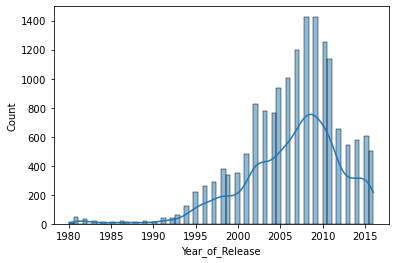

In [18]:
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='Year_of_Release', kde=True)

In [19]:
top_10_most_frequent = list(Video_Games_Sales_without_Scores_Columns.Year_of_Release.value_counts().head(10).index)

In [20]:
top_10_least_frequent = list(Video_Games_Sales_without_Scores_Columns.Year_of_Release.value_counts().sort_values(ascending=True).head(10).index)

(0.0, 50.0)

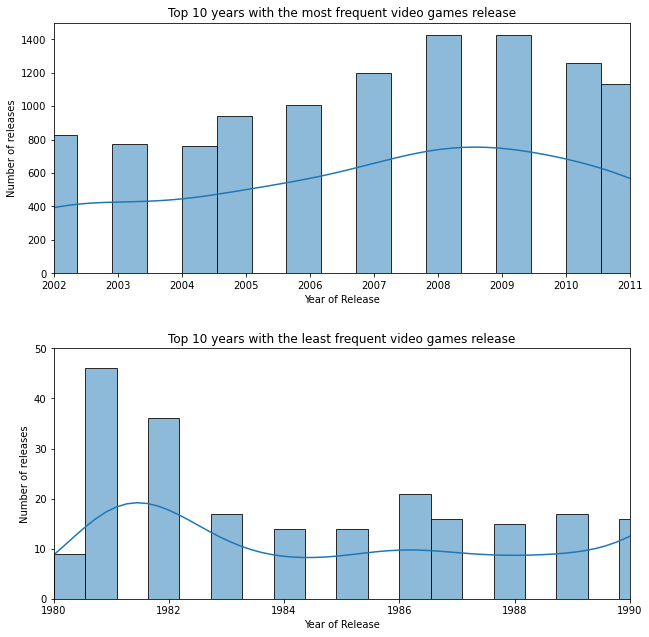

In [53]:
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace = 0, hspace = 0.3)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Year of Release')
axes.set_ylabel('Number of releases')
axes.set_title('Top 10 years with the most frequent video games release')
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='Year_of_Release', kde=True)
plt.xlim([min(top_10_most_frequent), max(top_10_most_frequent)])
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Year of Release')
axes.set_ylabel('Number of releases')
axes.set_title('Top 10 years with the least frequent video games release')
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='Year_of_Release', kde=True)
plt.xlim([min(top_10_least_frequent), max(top_10_least_frequent)])
plt.ylim(0, 50)

Sales

(0.0, 2.0)

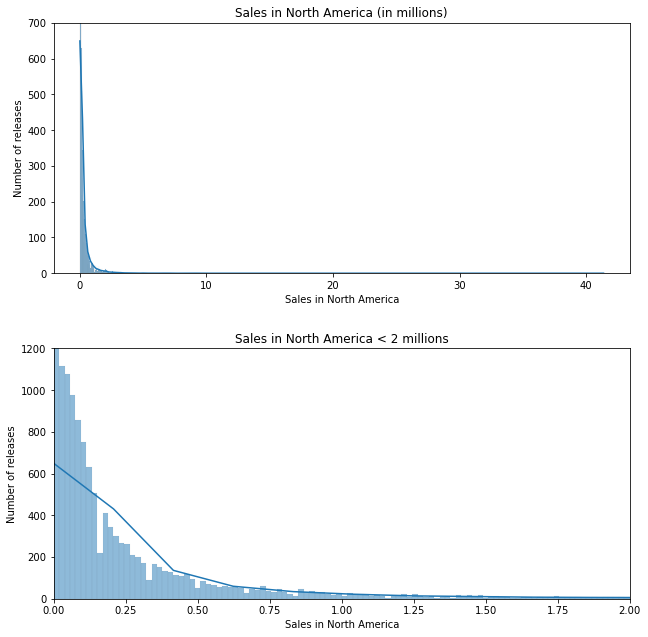

In [54]:
#Sales NA
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace = 0, hspace = 0.3)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Sales in North America')
axes.set_ylabel('Number of releases')
axes.set_title('Sales in North America (in millions)')
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='NA_Sales', kde=True)
plt.ylim(0, 700)
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Sales in North America')
axes.set_ylabel('Number of releases')
axes.set_title('Sales in North America < 2 millions')
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='NA_Sales', kde=True)
plt.ylim(0, 1200)
plt.xlim(0,2)

We have a right skewed distribution of the sales. Most of the video games sold in Noth America have less than 2 millions copies sold.

(0.0, 2.0)

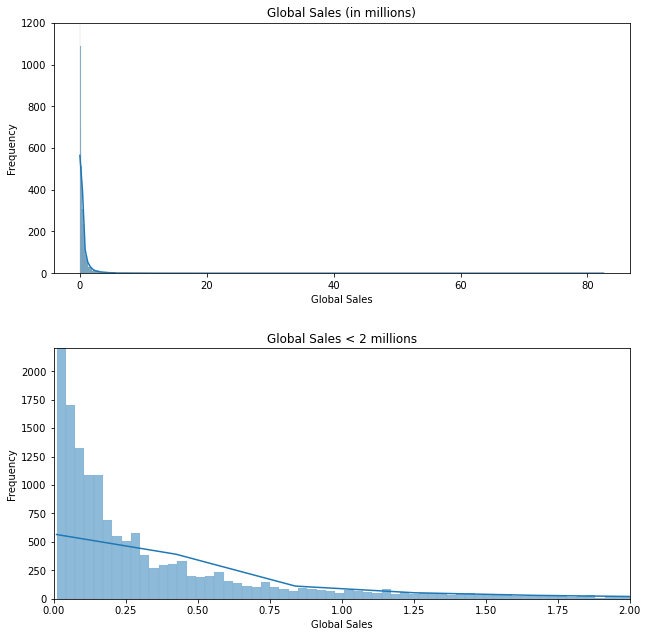

In [23]:
#Global sales

figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace = 0, hspace = 0.3)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Global Sales')
axes.set_ylabel('Frequency')
axes.set_title('Global Sales (in millions)')
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='Global_Sales', kde=True)
plt.ylim(0, 1200)
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Global Sales')
axes.set_ylabel('Frequency')
axes.set_title('Global Sales < 2 millions')
sns.histplot(data=Video_Games_Sales_without_Scores_Columns, x='Global_Sales', kde=True)
plt.ylim(0, 2200)
plt.xlim(0,2)

We have a right skewed distribution of the sales. Most of the video games sold globally have less than 2 millions copies sold.

### Distribution of qualitative variables

Name

In [24]:
top_5_most_frequent_names = list(Video_Games_Sales_without_Scores_Columns.Name.value_counts().head(5).index)

Text(0.5, 1.0, 'Top 5 most frequent video games')

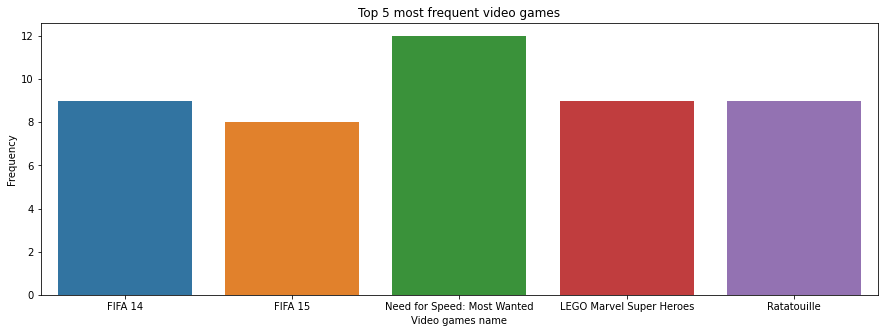

In [37]:
figure = plt.figure(figsize = (15, 5))
sns.countplot(data=Video_Games_Sales_without_Scores_Columns[Video_Games_Sales_without_Scores_Columns.Name.isin(top_5_most_frequent_names)],
             x='Name')
plt.xlabel('Video games name')
plt.ylabel('Frequency')
plt.title('Top 5 most frequent video games')
#Those are the games which are the most frequently remastered and/or available across different platforms

Platform

In [39]:
top_5_most_frequent_platform = list(Video_Games_Sales_without_Scores_Columns.Platform.value_counts().head(5).index)

Text(0.5, 1.0, 'Top 5 platform with the most video games released')

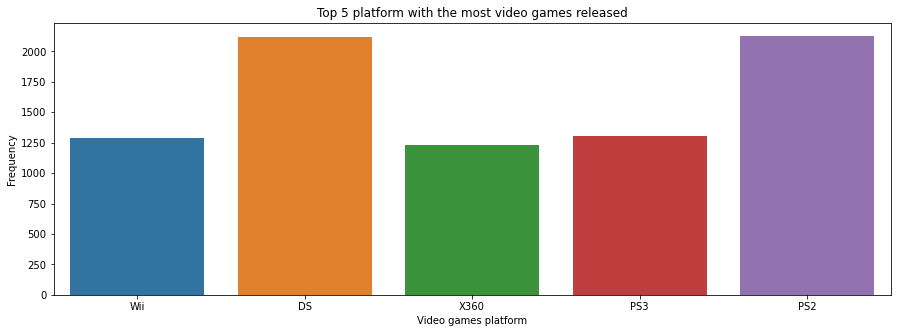

In [44]:
figure = plt.figure(figsize = (15, 5))
sns.countplot(data=Video_Games_Sales_without_Scores_Columns[Video_Games_Sales_without_Scores_Columns.Platform.isin(top_5_most_frequent_platform)],
             x='Platform')
plt.xlabel('Video games platform')
plt.ylabel('Frequency')
plt.title('Top 5 platform with the most video games released')

Publisher

In [46]:
top_5_most_frequent_publisher = list(Video_Games_Sales_without_Scores_Columns.Publisher.value_counts().head(5).index)

Text(0.5, 1.0, 'Top 5 publisher with the most video games released')

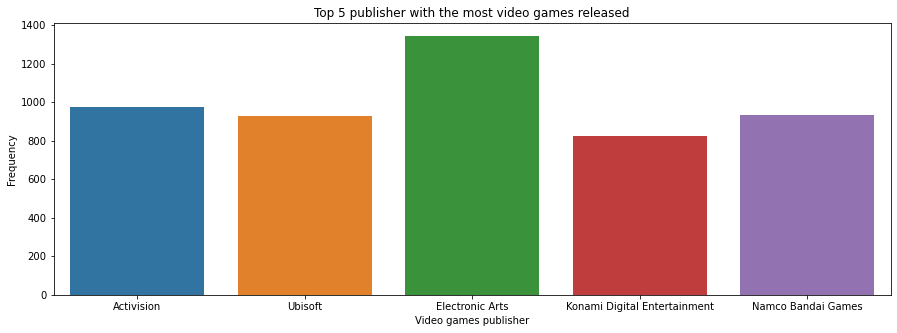

In [47]:
figure = plt.figure(figsize = (15, 5))
sns.countplot(data=Video_Games_Sales_without_Scores_Columns[Video_Games_Sales_without_Scores_Columns.Publisher.isin(top_5_most_frequent_publisher)],
             x='Publisher')
plt.xlabel('Video games publisher')
plt.ylabel('Frequency')
plt.title('Top 5 publisher with the most video games released')

## 5. Exploratory Analysis

World's best-selling games

In [77]:
global_sales_per_games_df = Video_Games_Sales_without_Scores_Columns.groupby(['Name']).sum()
global_sales_per_games_df['Name_games'] = global_sales_per_games_df.index

In [80]:
global_sales_per_games_df.reset_index

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  \
Name                                                                          
 Beyblade Burst                        2016.0      0.00      0.00      0.03   
 Fire Emblem Fates                     2015.0      0.81      0.23      0.52   
 Frozen: Olaf's Quest                  4026.0      0.48      0.53      0.00   
 Haikyu!! Cross Team Match!            2016.0      0.00      0.00      0.04   
 Tales of Xillia 2                     2012.0      0.20      0.12      0.45   
...                                       ...       ...       ...       ...   
thinkSMART FAMILY!                     2010.0      0.03      0.00      0.00   
thinkSMART: Chess for Kids             2011.0      0.01      0.00      0.00   
uDraw Studio                           2010.0      1.65      0.57      0.00   
uDraw Studio: Instant Artist           4022.0      0.07      0.10      0.00   
¡Shin Chan Flipa en colores!           2007.0      0.00      0.00      0.14   

                              Other_Sales  Global_Sales  \
Name                                                      
 Beyblade Burst                      0.00          0.03   
 Fire Emblem Fates                   0.11          1.68   
 Frozen: Olaf's Quest                0.09          1.12   
 Haikyu!! Cross Team Match!          0.00          0.04   
 Tales of Xillia 2                   0.07          0.84   
...                                   ...           ...   
thinkSMART FAMILY!                   0.00          0.03   
thinkSMART: Chess for Kids           0.00          0.01   
uDraw Studio                         0.20          2.42   
uDraw Studio: Instant Artist         0.02          0.19   
¡Shin Chan Flipa en colores!         0.00          0.14   

                                                Name_games  
Name                                                        
 Beyblade Burst                             Beyblade Burst  
 Fire Emblem Fates                       Fire Emblem Fates  
 Frozen: Olaf's Quest                 Frozen: Olaf's Quest  
 Haikyu!! Cross Team Match!     Haikyu!! Cross Team Match!  
 Tales of Xillia 2                       Tales of Xillia 2  
...                                                    ...  
thinkSMART FAMILY!                      thinkSMART FAMILY!  
thinkSMART: Chess for Kids      thinkSMART: Chess for Kids  
uDraw Studio                                  uDraw Studio  
uDraw Studio: Instant Artist  uDraw Studio: Instant Artist  
¡Shin Chan Flipa en colores!  ¡Shin Chan Flipa en colores!  

[11425 rows x 7 columns]

In [65]:
top_10_games_globally = list(global_sales_per_games_df.sort_values(by=['Global_Sales'],ascending=False).head(10).index)

In [71]:
top_10_games_NA = list(global_sales_per_games_df.sort_values(by=['NA_Sales'],ascending=False).head(10).index)
top_10_games_EU = list(global_sales_per_games_df.sort_values(by=['EU_Sales'],ascending=False).head(10).index)
top_10_games_JP = list(global_sales_per_games_df.sort_values(by=['JP_Sales'],ascending=False).head(10).index)

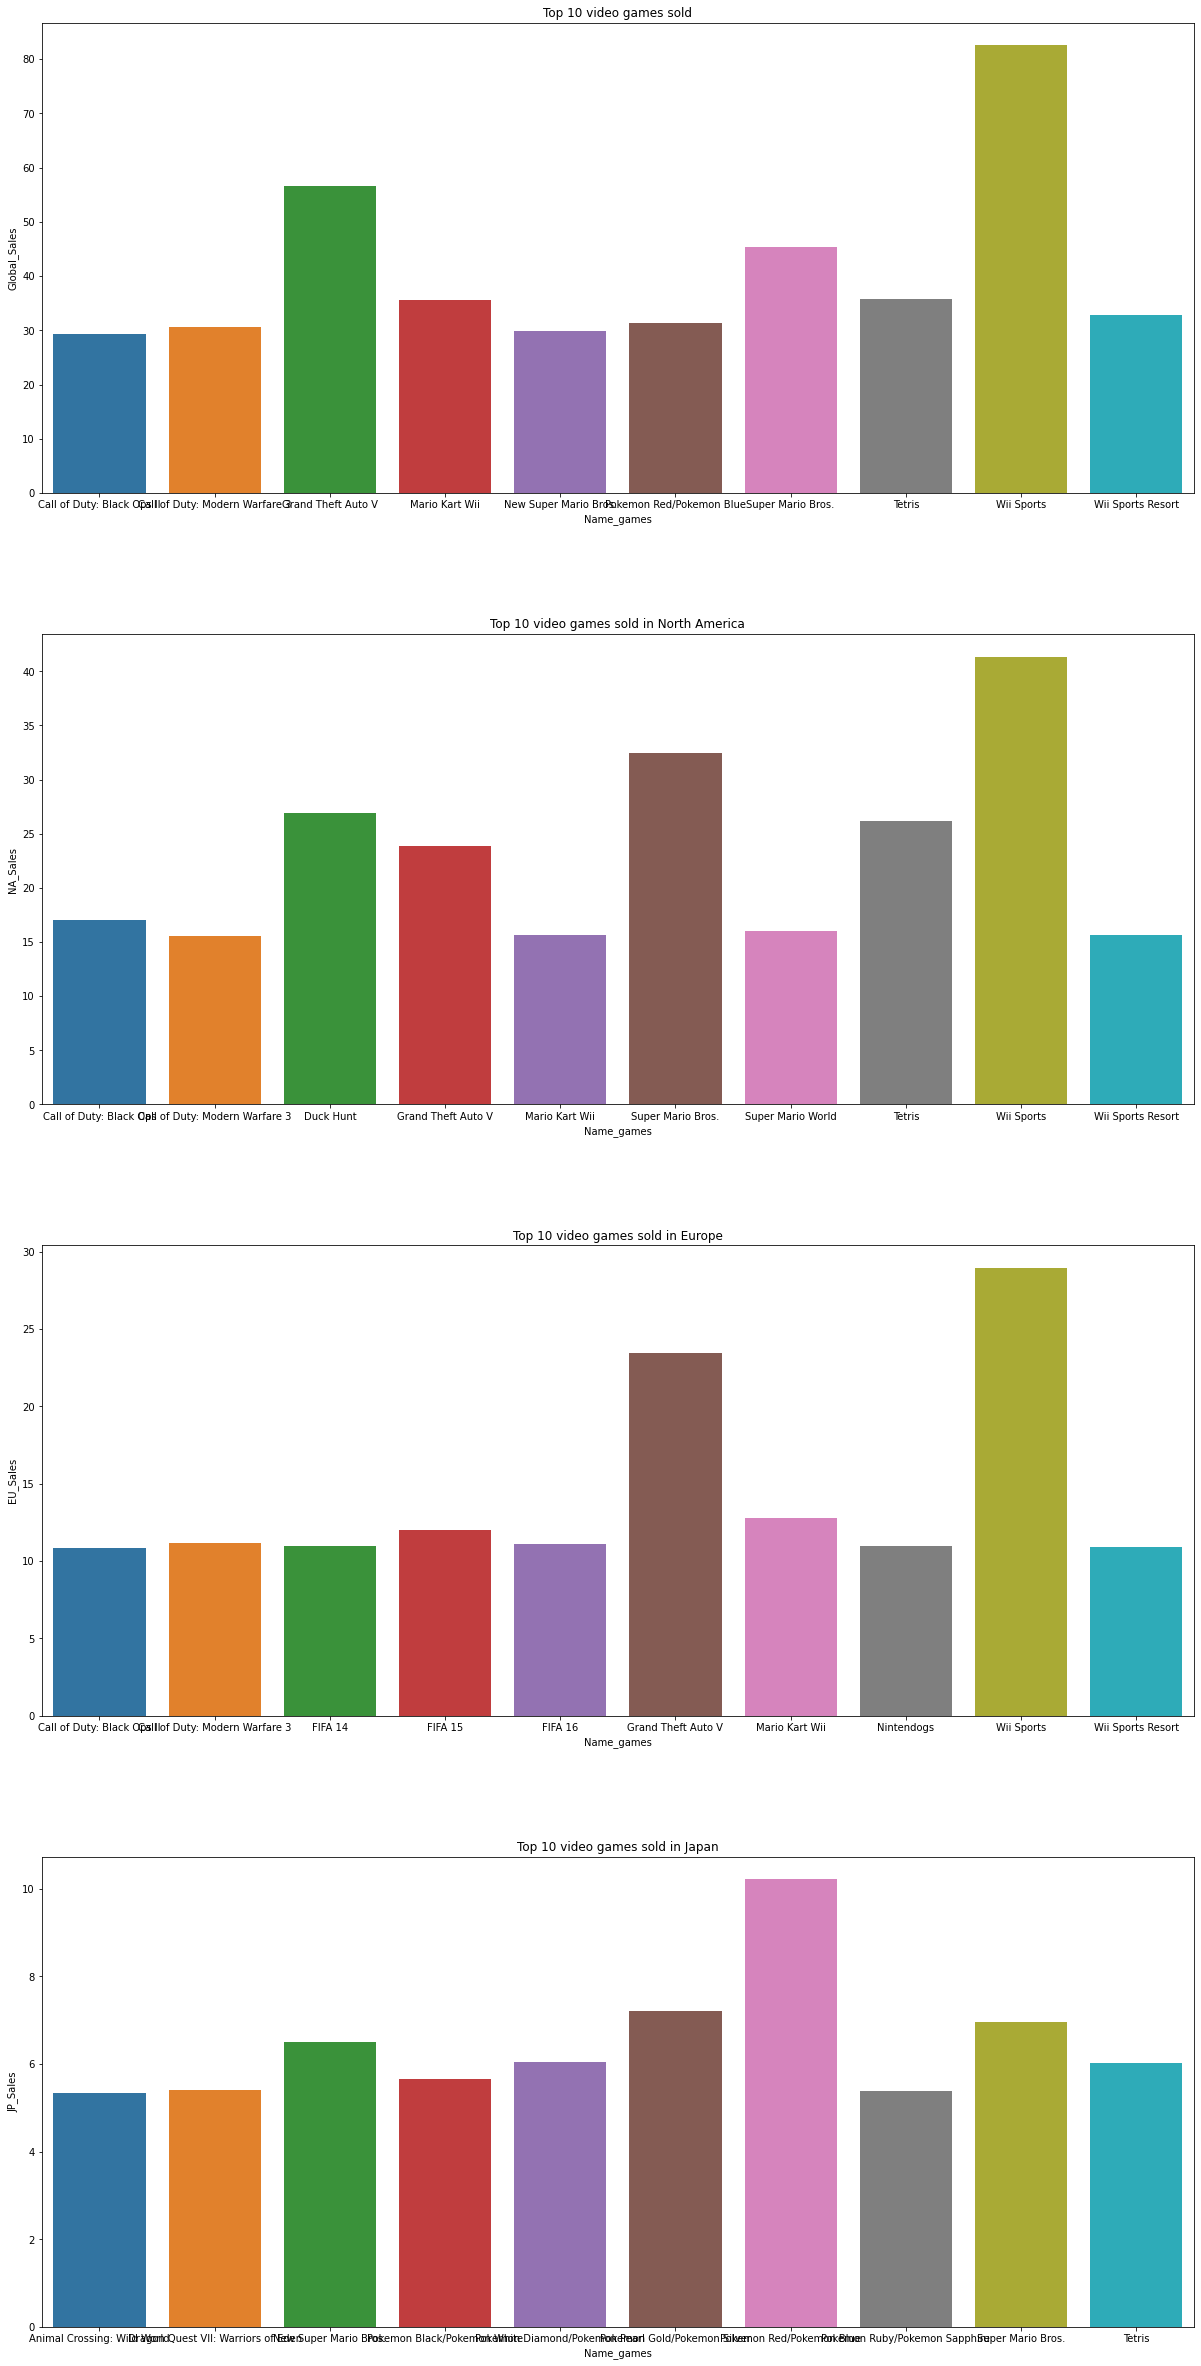

In [82]:
figure = plt.figure(figsize = (20, 40))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace = 0, hspace = 0.3)
axes = figure.add_subplot(4, 1, 1)
axes.set_xlabel('Game names')
axes.set_ylabel('Sales (in millions)')
axes.set_title('Top 10 video games sold')
sns.barplot(data=global_sales_per_games_df[global_sales_per_games_df.Name_games.isin(top_10_games_globally)], 
            x='Name_games', y='Global_Sales')
axes = figure.add_subplot(4, 1, 2)
axes.set_xlabel('Game names')
axes.set_ylabel('Sales (in millions)')
axes.set_title('Top 10 video games sold in North America')
sns.barplot(data=global_sales_per_games_df[global_sales_per_games_df.Name_games.isin(top_10_games_NA)], 
            x='Name_games', y='NA_Sales')
axes = figure.add_subplot(4, 1, 3)
axes.set_xlabel('Game names')
axes.set_ylabel('Sales (in millions)')
axes.set_title('Top 10 video games sold in Europe')
sns.barplot(data=global_sales_per_games_df[global_sales_per_games_df.Name_games.isin(top_10_games_EU)], 
            x='Name_games', y='EU_Sales')
axes = figure.add_subplot(4, 1, 4)
axes.set_xlabel('Game names')
axes.set_ylabel('Sales (in millions)')
axes.set_title('Top 10 video games sold in Japan')
sns.barplot(data=global_sales_per_games_df[global_sales_per_games_df.Name_games.isin(top_10_games_JP)], 
            x='Name_games', y='JP_Sales')